# Exploratory Data Analysis- Credit Card Payment Fraud 
The dataset contans infomation regarding the general description of the customers and their following responses whether they have defaulted their credit card. The objective is to use this dataset to build a model that predicts whether a customer will default his/her payment.

In this notebook we have performed EDA. The dataset contains 24 input features and one target variable 'default payment'. The primary objective of EDA is to understand 

*   which features will be help in creating a model.(having associtions with target variables) 
*   Feature reduction - there are 24 input features. We need to reduce this, and utilize only those features that will help in prediction.



In [ ]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import chi2_contingency
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing the dataset
df = pd.read_csv('creditrisk.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
#checking for missing values
df.isnull().mean()

ID                 0.0
LIMIT_BAL          0.0
SEX                0.0
EDUCATION          0.0
MARRIAGE           0.0
AGE                0.0
PAY_0              0.0
PAY_2              0.0
PAY_3              0.0
PAY_4              0.0
PAY_5              0.0
PAY_6              0.0
BILL_AMT1          0.0
BILL_AMT2          0.0
BILL_AMT3          0.0
BILL_AMT4          0.0
BILL_AMT5          0.0
BILL_AMT6          0.0
PAY_AMT1           0.0
PAY_AMT2           0.0
PAY_AMT3           0.0
PAY_AMT4           0.0
PAY_AMT5           0.0
PAY_AMT6           0.0
default payment    0.0
dtype: float64

### Observation: 
There are no missing values. Hence we proceed with the first input feature

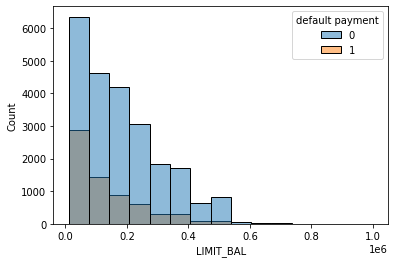

In [ ]:
sns.histplot(df,x = 'LIMIT_BAL',hue = 'default payment', bins = 15)

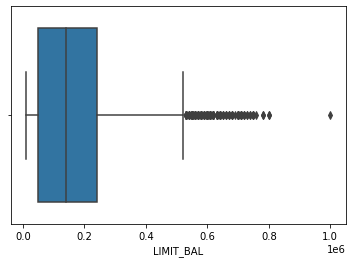

In [ ]:
sns.boxplot(data = df,x= 'LIMIT_BAL')

### Observation:
For the feature 'LIMIT_BAL' we observe that it is positively skewed. Hence we perform Logarithemic transformtion 

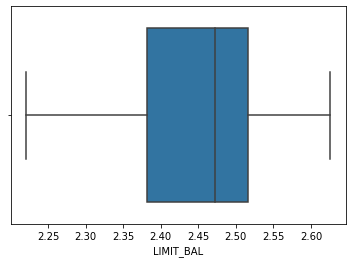

In [ ]:
df['LIMIT_BAL'] = np.log(df['LIMIT_BAL'])
sns.boxplot(data = df,x= 'LIMIT_BAL')

We observe that after transformation 'LIMIT_BAL' does not have any outlier

## Visualization:
We have plotted the categorical and discrete variables to understand which labels are actually contributing in predicting the target variable

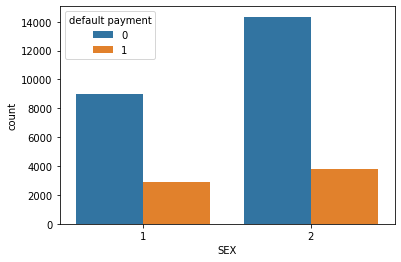

In [ ]:
sns.countplot(data = df,x ='SEX',hue = 'default payment')

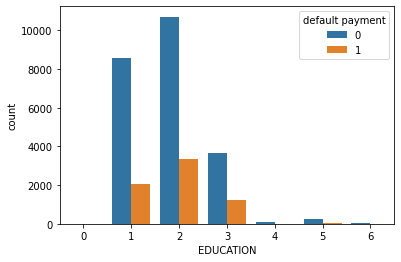

In [ ]:
sns.countplot(data = df,x ='EDUCATION',hue = 'default payment')

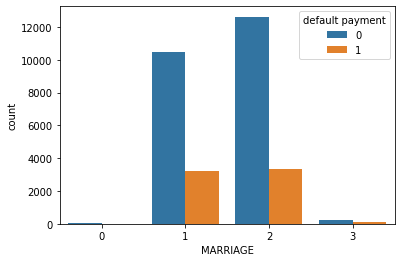

In [ ]:
sns.countplot(data = df,x ='MARRIAGE',hue = 'default payment')

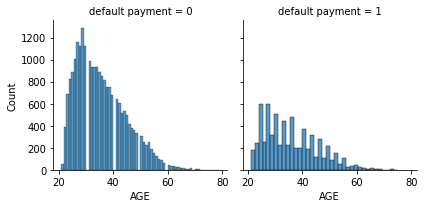

In [ ]:
d = df[df['default payment'].isin([0, 1])]
g = sns.FacetGrid(df, col="default payment")
g.map(sns.histplot, "AGE")

### Observation 
Here are the takeaways from the above visualizations- 
1. All the labels of 'SEX' feature need to be considered
2. For 'EDUCATION' the labels '1','2','3' are more prominent, hence we can create our model based on these three labels only 
3. For 'MARRIAGE' the labels '1','2' HAVE more prominent responses, hence we can create our model based on these two labels only 


'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6' are categorical variables that indicate the status of payment of the last 6 transactions. 

Here we first understand their association among each other and then with the target variable. We have used Chi-Square test of independence. 

In [ ]:
p_val = []
col = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for c in col:
  t = pd.crosstab(df[c],df['default payment'])
  stat, p, dof, expected = chi2_contingency(t)
  p_val.append(p)
print(p_val)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
p_val = []
col = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for i in col:
  for j in col:
    t = pd.crosstab(df[i],df[j])
    stat, p1, dof, expected = chi2_contingency(t)
    p_val.append(p1)
print(p_val)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Observation:
We have observed the following-
1. the 6 features are not independent 
2. they are not independent with the target variable. 
Hence we can keep only one of the variables for model creation (since all are dependent). 

Note that : level of significance considered here is  0.05

'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6' represent the last 6 billing amount through credit card payment. 

To understand their association we plot their correlation

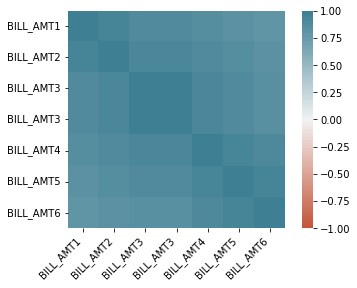

In [ ]:
#Correlation
d = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
corr1 = df[d].corr()
ax = sns.heatmap(
    corr1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Observation:
We observe that 6 variables are highly correlated. Hence we perform PCA to reduce the number of features 

In [ ]:
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']] = StandardScaler().fit_transform(df[['BILL_AMT1','BILL_AMT2',
                                                                                                                   'BILL_AMT3','BILL_AMT4',
                                                                                                                   'BILL_AMT5','BILL_AMT6']])

In [ ]:
#performing PCA after standarizing the variables. PCA explains 95% of the original variance
pca = PCA(0.95)
principalComponents = pca.fit_transform(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']])
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.90555253 0.0509867 ]


In [ ]:
#Dropping the variables as discused above
#'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6 - since all are correlated
#'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'- since we have performed PCA
df.drop(['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis = 1,inplace = True)

In [ ]:
d1 = pd.DataFrame(principalComponents)
d1.head()

,0,1
0,-1.611148,0.012479
1,-1.547595,-0.062344
2,-1.035874,0.011256
3,-0.250712,0.174374
4,-0.968951,-0.213032


In [ ]:
#merging the principal components with the dataset
data = pd.concat([df,d1], axis =1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment,0,1
0,1,20000,2,2,1,24,2,0,689,0,0,0,0,1,-1.611148,0.012479
1,2,120000,2,2,2,26,-1,0,1000,1000,1000,0,2000,1,-1.547595,-0.062344
2,3,90000,2,2,2,34,0,1518,1500,1000,1000,1000,5000,0,-1.035874,0.011256
3,4,50000,2,2,1,37,0,2000,2019,1200,1100,1069,1000,0,-0.250712,0.174374
4,5,50000,1,2,1,57,-1,2000,36681,10000,9000,689,679,0,-0.968951,-0.213032


In [ ]:
data = data.rename(columns = {"default payment":"default_payment"})

'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6' - they are the payments cleared with respect to the last 6 bills . We observe that:

*   these 6 features are not correlated.
*   Hence we perform MANOVA to understand their relation with the target variable.



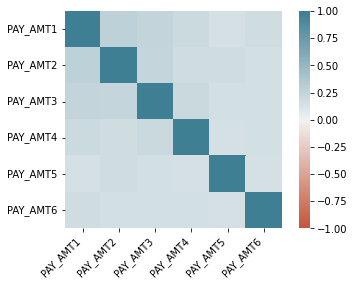

In [ ]:
#Correlation
d1 = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
corr2 = df[d1].corr()
ax = sns.heatmap(
    corr2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#Standardizing the features
data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']] = StandardScaler().fit_transform(data[['PAY_AMT1','PAY_AMT2',
                                                                                                                   'PAY_AMT3','PAY_AMT4',
                                                                                                                   'PAY_AMT5','PAY_AMT6']])

In [ ]:
manov = MANOVA.from_formula('PAY_AMT1+ PAY_AMT2+ PAY_AMT3+ PAY_AMT4+ PAY_AMT5+ PAY_AMT6 ~ default_payment', data=data)

In [ ]:
print(manov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9976 6.0000 29993.0000 12.1550 0.0000
         Pillai's trace 0.0024 6.0000 29993.0000 12.1550 0.0000
 Hotelling-Lawley trace 0.0024 6.0000 29993.0000 12.1550 0.0000
    Roy's greatest root 0.0024 6.0000 29993.0000 12.1550 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
    default_payment     Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9891 6.0000 29993.0000 54.9501 0.0000
         Pillai's trace 0.0109 6.0000 29993.0000 54.9501 0.

### Observation:
We observe that the 6 features containing the payment information are not independent with the target variable, hence they are to be kept at first stage of model building

# Conclusion:

This is the end of our Exploratory Data Analysis. Thus we take into account the observations discussed above before we move into model building stage. 

## Thank You